## Scraping Google Map data with locations of Calgary pubs

Base URL

https://www.google.com/maps/search/pubs+in+calgary/@51.0453812,-114.2203065,12z

Inspect page, select body, right click then "edit as HTML", copy into .html file, run code in this notebook. 

In [130]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [38]:
# Scrape data
page = open("./google_maps.html")
soup = BeautifulSoup(page.read())

# attempt 1
subsection = soup.find_all("div",
                           {"class":"section-layout section-scrollbox scrollable-y scrollable-show section-layout-flex-vertical section-layout-inset-shadow"})
google_locations = subsection[0].find_all("a",href=True)

# attempt 2
pub_name = []
pub_href = []
for a in soup.find_all('a', href=True):
    try:
        pub_name.append(a['aria-label'])
        pub_href.append(a['href'])
        #print("Found the URL:", a['href'])
        #print("With name",a['aria-label'])
    except:
        continue

In [105]:
# Selecting data with pub information
pub_name = pub_name[1:-1]
pub_href = pub_href[1:-1]

In [127]:
#longitude
pub_longitude = [float(pub_href[i].split("data")[1].split("!")[-1][2:13]) for i in range(len(pub_href))]
#latitude
pub_latitude = [float(pub_href[i].split("data")[1].split("!")[-2][2:]) for i in range(len(pub_href))]

In [135]:
# form dataframe
calgary_pubs = pd.DataFrame({"PubName":pub_name,
             "Longitude":pub_longitude,
             "Latitude":pub_latitude,
             "GoogleURL":pub_href})
calgary_pubs

,PubName,Longitude,Latitude,GoogleURL
0,Last Best Brewing & Distilling,-114.074573,51.042601,https://www.google.com/maps/place/Last+Best+Br...
1,Bottlescrew Bill's Pub,-114.065449,51.043604,https://www.google.com/maps/place/Bottlescrew+...
2,Kensington Pub,-114.087557,51.052825,https://www.google.com/maps/place/Kensington+P...
3,The Garrison Pub & Eatery,-114.108437,51.016279,https://www.google.com/maps/place/The+Garrison...
4,Newcastle Pub,-114.124126,51.037655,https://www.google.com/maps/place/Newcastle+Pu...
5,The Ship & Anchor,-114.073772,51.038022,https://www.google.com/maps/place/The+Ship+%26...
6,Kilkenny Irish Pub,-114.126880,51.086993,https://www.google.com/maps/place/Kilkenny+Iri...
7,Side Street Pub & Grill,-114.089241,51.052117,https://www.google.com/maps/place/Side+Street+...
8,St. James Corner Restaurant & Irish Pub,-114.066037,51.040691,https://www.google.com/maps/place/St.+James+Co...
9,Tipperary's Pub,-114.106739,51.067292,https://www.google.com/maps/place/Tipperary's+...


In [149]:
latitude = calgary_pubs['Latitude'].to_list()[0]
longitude = calgary_pubs["Longitude"].to_list()[0]


# Initial coordinates 
SC_COORDINATES = [latitude, longitude]

# Create a map using our initial coordinates
map_osm=folium.Map(location=SC_COORDINATES, zoom_start=10, tiles='Stamen Terrain')

#Create marker cluster and add to our map
marker_cluster = MarkerCluster().add_to(map_osm)

# Iterate over each record, 
MAX_RECORDS = len(calgary_pubs)
# For each record in rma_sample
for each in calgary_pubs[0:MAX_RECORDS].iterrows():
    # Use folium.Marker function, use X and Y coordinates to specify location
    folium.Marker(location = [each[1]['Latitude'],each[1]['Longitude']],
                 # Add pub name
                  popup=folium.Popup(each[1]['PubName'],sticky=True)).add_to(map_osm)

# Show the map
display(map_osm)

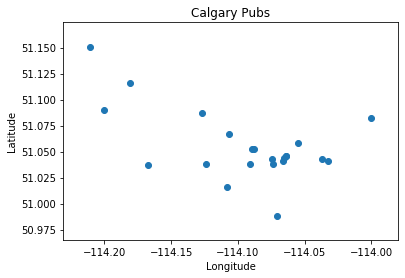

In [147]:
# Plot
plt.scatter(calgary_pubs["Longitude"],calgary_pubs['Latitude'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Calgary Pubs")
plt.show()